# 文字と図形からなる標章の生成

- 全結合層５層
- 潜在空間の次元=2000
- 画像サイズ=(256, 256)
- 学習データ数=14000
- テストデータ数=1000
- 学習エポック数=500

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

%matplotlib inline

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
import os
import re
import pickle

In [0]:
rng = np.random.RandomState(1234)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
class SWITCH:
  IS_IMGOBJ_SAVED = True

In [0]:
class PATH:
  class DPATH:
    ORIGINAL = 'drive/My Drive/Public/Data/20190225+2206/'
    OBJ = 'drive/My Drive/Public/Data/20190310+2259/'

In [0]:
class Directory:
  def __init__(self, dpath):
    self.dpath = dpath
    self.fnames = []
  
  def get_fnames(self):
    fnames = os.listdir(self.dpath)
    
    for fname in fnames:
      if re.match(r'^.*\.JPG$', fname) is not None:
        self.fnames.append(fname)
    
    return True
  
  def escape_fnames(self):
    _fnames = []
    for idx, fname in enumerate(self.fnames):
      if ((idx+1) % 100) == 0:
        print('Processing: {}/{}'.format(idx+1, len(self.fnames)))
      
      _fnames.append(re.sub(r'\\', '\\\\', fname))
     
    self.fnames = _fnames
    
    return True
  
  def __call__(self):
    self.get_fnames()
    self.escape_fnames()
    
    return True

In [9]:
directory_obj = Directory(PATH.DPATH.ORIGINAL)
directory_obj()

Processing: 100/23576
Processing: 200/23576
Processing: 300/23576
Processing: 400/23576
Processing: 500/23576
Processing: 600/23576
Processing: 700/23576
Processing: 800/23576
Processing: 900/23576
Processing: 1000/23576
Processing: 1100/23576
Processing: 1200/23576
Processing: 1300/23576
Processing: 1400/23576
Processing: 1500/23576
Processing: 1600/23576
Processing: 1700/23576
Processing: 1800/23576
Processing: 1900/23576
Processing: 2000/23576
Processing: 2100/23576
Processing: 2200/23576
Processing: 2300/23576
Processing: 2400/23576
Processing: 2500/23576
Processing: 2600/23576
Processing: 2700/23576
Processing: 2800/23576
Processing: 2900/23576
Processing: 3000/23576
Processing: 3100/23576
Processing: 3200/23576
Processing: 3300/23576
Processing: 3400/23576
Processing: 3500/23576
Processing: 3600/23576
Processing: 3700/23576
Processing: 3800/23576
Processing: 3900/23576
Processing: 4000/23576
Processing: 4100/23576
Processing: 4200/23576
Processing: 4300/23576
Processing: 4400/235

True

In [0]:
class MyImage:
  IMG_TOTAL_NUM = 15000
  IMG_PREVIEW_NUM = 10
  
  IMG_SIZE_WIDTH = 256
  IMG_SIZE_HEIGHT = 256
  
  IMG_SIZE = (IMG_SIZE_WIDTH, IMG_SIZE_HEIGHT)
  
  IMG_FORMAT = 'L'
  
  BATCH_SIZE = 100

  def __init__(self):
    self.imgs = []

  @staticmethod
  def _save_img_obj(dpath, suffix, imgs):
    print('Saving images object')
    
    print('Saving imgs obj')
    with open('{}imgs{}.bin'.format(dpath, suffix), 'wb') as web:
      pickle.dump(imgs, web)
     
    return True

  @staticmethod
  def _load_img_obj(dpath, suffix):
    print('Loading images object')
    
    with open('{}imgs{}.bin'.format(dpath, suffix), 'rb') as web:
      imgs = pickle.load(web)
      
    return imgs
    
  def get_images(self, dpath_original, fnames, dpath_obj):
    print('Getting images')
    
    iterations = MyImage.IMG_TOTAL_NUM // MyImage.BATCH_SIZE
    
    for i in range(iterations):
      print('Iteration: ''{}/{}'.format(i+1, iterations))
      
      if SWITCH.IS_IMGOBJ_SAVED:
        imgs = MyImage._load_img_obj(dpath_obj, '_{}'.format(i))
      else:
        imgs = [Image.open(dpath_original + fname) for fname in fnames[i*MyImage.BATCH_SIZE:(i+1)*MyImage.BATCH_SIZE]]
        imgs = [img.resize(MyImage.IMG_SIZE) for img in imgs]
        imgs = [img.convert(MyImage.IMG_FORMAT) for img in imgs]
        imgs = [ImageOps.invert(img) for img in imgs]
      
        if IS_IMGOBJ_SAVED:
          MyImage._save_img_obj(dpath_obj, '_{}'.format(i), imgs)
      
      self.imgs.extend(imgs)
      
    return True
  
  def preview_images(self):
    for img in self.imgs[:MyImage.IMG_PREVIEW_NUM]:
      plt.imshow(img)
      plt.show()

In [11]:
img_obj = MyImage()
img_obj.get_images(directory_obj.dpath, directory_obj.fnames, PATH.DPATH.OBJ)

Getting images
Iteration: 1/150
Loading images object
Iteration: 2/150
Loading images object
Iteration: 3/150
Loading images object
Iteration: 4/150
Loading images object
Iteration: 5/150
Loading images object
Iteration: 6/150
Loading images object
Iteration: 7/150
Loading images object
Iteration: 8/150
Loading images object
Iteration: 9/150
Loading images object
Iteration: 10/150
Loading images object
Iteration: 11/150
Loading images object
Iteration: 12/150
Loading images object
Iteration: 13/150
Loading images object
Iteration: 14/150
Loading images object
Iteration: 15/150
Loading images object
Iteration: 16/150
Loading images object
Iteration: 17/150
Loading images object
Iteration: 18/150
Loading images object
Iteration: 19/150
Loading images object
Iteration: 20/150
Loading images object
Iteration: 21/150
Loading images object
Iteration: 22/150
Loading images object
Iteration: 23/150
Loading images object
Iteration: 24/150
Loading images object
Iteration: 25/150
Loading images o

True

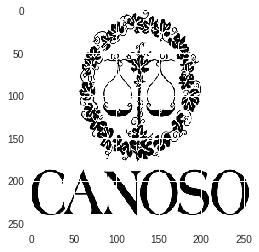

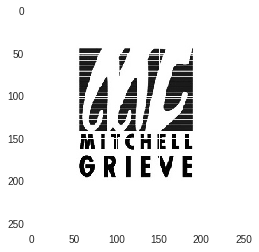

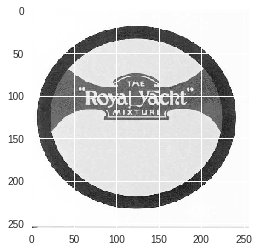

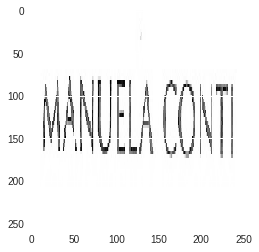

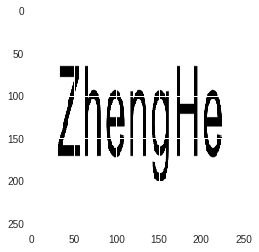

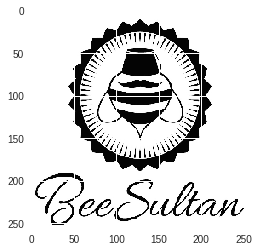

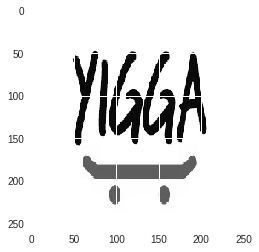

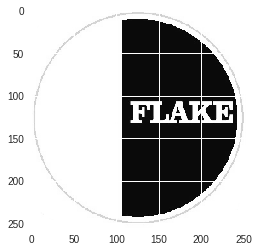

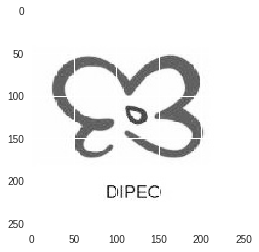

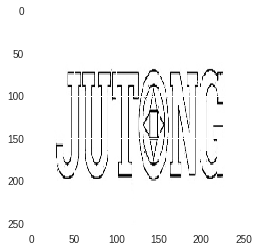

In [12]:
img_obj.preview_images()

In [0]:
class Data:
  VALID_DATA_NUM = 1000
  BATCH_SIZE = 100
  
  def __init__(self):
    self.x_train = None
    self.x_valid = None
    
  def make_numpy_array(self, imgs):
    print('Making numpy array')
    self.x_train = np.array([np.asarray(img) for img in imgs[:-Data.VALID_DATA_NUM]])
    self.x_valid = np.array([np.asarray(img) for img in imgs[-Data.VALID_DATA_NUM:]])
  
    return True
  
  def standardize(self):
    print('Standardizing')
    self.x_train = self.x_train / 255
    self.x_valid = self.x_valid / 255
    
    return True
  
  def reshape(self):
    self.x_train = self.x_train.reshape(-1, MyImage.IMG_SIZE_WIDTH*MyImage.IMG_SIZE_HEIGHT)
    self.x_valid = self.x_valid.reshape(-1, MyImage.IMG_SIZE_WIDTH*MyImage.IMG_SIZE_HEIGHT)

In [14]:
data_obj = Data()
data_obj.make_numpy_array(img_obj.imgs)

Making numpy array


True

In [15]:
data_obj.standardize()

Standardizing


True

In [0]:
data_obj.reshape()

In [0]:
class Model:
  Z_DIM = 2000
  
  @staticmethod
  def initialize():
    tf.reset_default_graph()

  @staticmethod
  def tf_log(x):
      return tf.log(tf.clip_by_value(x, 1e-10, x))

  @staticmethod
  def encoder(x, is_training):
      with tf.variable_scope('Encoder', reuse=tf.AUTO_REUSE):
          h = tf.layers.Dense(units=512, activation=tf.nn.relu)(x)        
          h = tf.layers.Dense(units=1024, activation=tf.nn.relu)(h)        
          h = tf.layers.Dense(units=1024, activation=tf.nn.relu)(h)        
          h = tf.layers.Dense(units=32*32, activation=tf.nn.relu)(h)

          mean = tf.layers.Dense(units=Model.Z_DIM)(h)
          var = tf.layers.Dense(units=Model.Z_DIM, activation=tf.nn.softplus)(h)

      return mean, var

  @staticmethod
  def sampling_z(mean, var):
      epsilon = tf.random_normal(shape=tf.shape(mean))
      z = mean + tf.sqrt(var) * epsilon
      return z

  @staticmethod
  def decoder(z, is_training):
      with tf.variable_scope('Decoder', reuse=tf.AUTO_REUSE):
          h = tf.layers.Dense(units=512, activation=tf.nn.relu)(z)
          h = tf.layers.Dense(units=1024, activation=tf.nn.relu)(h)        
          h = tf.layers.Dense(units=1024, activation=tf.nn.relu)(h)        
          h = tf.layers.Dense(units=512, activation=tf.nn.relu)(h)         
          y = tf.layers.Dense(units=256*256, activation=tf.nn.sigmoid)(h)

      return y

  @staticmethod
  def lower_bound(x, is_training):
      #Encode
      mean, var = Model.encoder(x, is_training)
      KL = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + Model.tf_log(var) - mean**2 - var, axis=1))

      #Z
      z = Model.sampling_z(mean, var)

      #Decode
      y = Model.decoder(z, is_training)
      reconstruction = tf.reduce_mean(tf.reduce_sum(x * Model.tf_log(y) + (1 - x) * Model.tf_log(1 - y), axis=1))

      lower_bound = [-KL, reconstruction]

      return lower_bound

In [18]:
x = tf.placeholder(tf.float32, [None, MyImage.IMG_SIZE_WIDTH*MyImage.IMG_SIZE_HEIGHT])
is_training = tf.placeholder(tf.bool, shape=())

lower_bound = Model.lower_bound(x, is_training)

cost = -tf.reduce_sum(lower_bound) # 下界を最大化するため、マイナスをとる

optimizer = tf.train.AdamOptimizer(learning_rate=0.00005)

train = optimizer.minimize(cost)

valid = tf.reduce_sum(lower_bound)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
class Train:
  N_EPOCHS = 500
  
  BATCH_SIZE = 100
  N_BATCHES = (MyImage.IMG_TOTAL_NUM - Data.VALID_DATA_NUM)// BATCH_SIZE


  def __init__(self):
    self.sess = tf.Session()

  def initialize(self):
    init = tf.global_variables_initializer()
    self.sess.run(init)
    
    return True
  
  def __call__(self, x_train, x_valid):
    for epoch in range(Train.N_EPOCHS):
      print('Processing epoch: {}/{}'.format(epoch+1, Train.N_EPOCHS))
      
      rng.shuffle(x_train)
      lower_bound_all = []

      for i in range(Train.N_BATCHES):
        start = i * Train.BATCH_SIZE
        end = start + Train.BATCH_SIZE
        
        _, lowerbound = self.sess.run([train, lower_bound], feed_dict={x: x_train[start:end], is_training: True})

        lower_bound_all.append(lowerbound)

      lower_bound_all = np.mean(lower_bound_all, axis=0)
      lower_bound_valid = self.sess.run(valid, feed_dict={x: x_valid, is_training: False})

      print(
          'EPOCH: {:005}, Train Lower Bound: {:.1f}, ({:.1f}, {:.1f}), Valid Lower Bound: {:.1f}'.format(
            epoch+1,
            np.sum(lower_bound_all),
            lower_bound_all[0],
            lower_bound_all[1],
            lower_bound_valid
        )
      )
      
    return True

In [20]:
train_obj = Train()
train_obj.initialize()

True

In [21]:
train_obj(data_obj.x_train, data_obj.x_valid)

Processing epoch: 1/500
EPOCH: 00001, Train Lower Bound: -29680.2, (-207.9, -29472.4), Valid Lower Bound: -25676.7
Processing epoch: 2/500
EPOCH: 00002, Train Lower Bound: -25544.3, (-181.3, -25363.0), Valid Lower Bound: -25617.2
Processing epoch: 3/500
EPOCH: 00003, Train Lower Bound: -25193.4, (-160.7, -25032.7), Valid Lower Bound: -24747.6
Processing epoch: 4/500
EPOCH: 00004, Train Lower Bound: -24403.6, (-158.8, -24244.8), Valid Lower Bound: -24184.8
Processing epoch: 5/500
EPOCH: 00005, Train Lower Bound: -23733.1, (-176.6, -23556.5), Valid Lower Bound: -23343.3
Processing epoch: 6/500
EPOCH: 00006, Train Lower Bound: -22961.4, (-174.1, -22787.3), Valid Lower Bound: -22967.4
Processing epoch: 7/500
EPOCH: 00007, Train Lower Bound: -22781.7, (-170.7, -22611.0), Valid Lower Bound: -22794.6
Processing epoch: 8/500
EPOCH: 00008, Train Lower Bound: -22669.4, (-174.3, -22495.1), Valid Lower Bound: -22610.3
Processing epoch: 9/500
EPOCH: 00009, Train Lower Bound: -22507.6, (-176.5, -223

True

In [0]:
x = tf.placeholder(tf.float32, [None, MyImage.IMG_SIZE_WIDTH*MyImage.IMG_SIZE_HEIGHT])
is_training = tf.placeholder(tf.bool, shape=())
sample_z_func = Model.encoder(x, is_training) # mean, var

In [0]:
z = tf.placeholder(tf.float32, [None, Model.Z_DIM])
sample_x_func = Model.decoder(z, is_training) # mean

In [0]:
def deprocess(x):
    _x = x.reshape(x.shape[0], MyImage.IMG_SIZE_WIDTH, MyImage.IMG_SIZE_HEIGHT)
    return 1 - _x

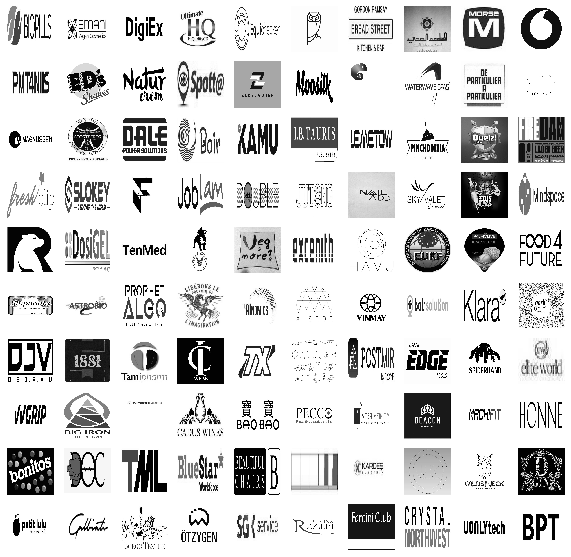

In [25]:
n_samples = 100

fig = plt.figure(figsize=(10, 10))

_sample_x = deprocess(data_obj.x_train[:n_samples])

for j, _x in enumerate(_sample_x):
    ax = fig.add_subplot(10, 10, j+1, xticks=[], yticks=[])
    ax.imshow(_x, 'gray')

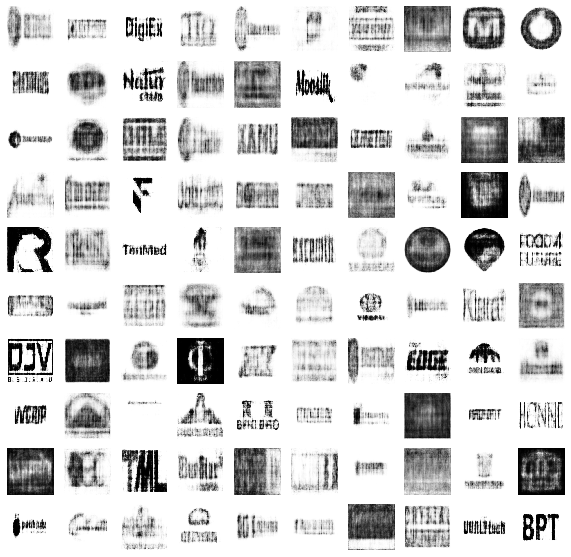

In [26]:
# Encode
mean, var = train_obj.sess.run(sample_z_func, feed_dict={x: data_obj.x_train[:n_samples], is_training:False})
sample_z = mean

# Decode
sample_x = train_obj.sess.run(sample_x_func, feed_dict={z: sample_z, is_training:False})

fig = plt.figure(figsize=(10, 10))

_sample_x = deprocess(sample_x)

for j, _x in enumerate(_sample_x):
    ax = fig.add_subplot(10, 10, j+1, xticks=[], yticks=[])
    ax.imshow(_x, 'gray')

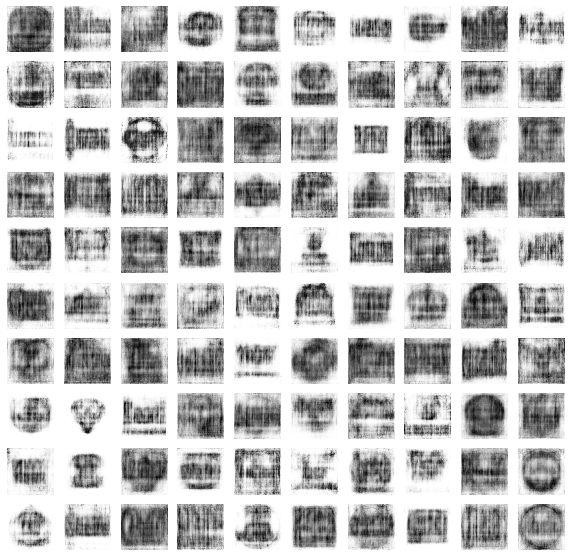

In [27]:
sample_z = np.random.standard_normal((n_samples, Model.Z_DIM)).astype('float32')
sample_z = train_obj.sess.run(sample_x_func, feed_dict={z: sample_z, is_training:False})

fig = plt.figure(figsize=(10, 10))

_sample_x = deprocess(sample_z)

for j, _x in enumerate(_sample_x):
    ax = fig.add_subplot(10, 10, j+1, xticks=[], yticks=[])
    ax.imshow(_x, 'gray')

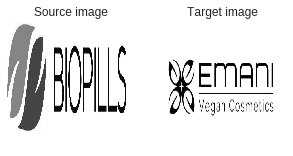

In [28]:
# Source
x_0 = data_obj.x_train[:1]

# Target
x_1 = data_obj.x_train[1:2]

fig = plt.figure(figsize=(5, 5))
ax_0 = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax_0.set_title('Source image')
ax_0.imshow(deprocess(x_0)[0], 'gray')

ax_1 = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax_1.set_title('Target image')
ax_1.imshow(deprocess(x_1)[0], 'gray')

plt.show()

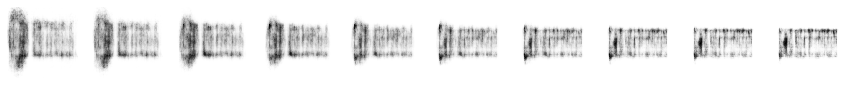

In [29]:
# 潜在空間に写像
sample_z_0, _ = train_obj.sess.run(sample_z_func, feed_dict={x: x_0, is_training:False})
sample_z_1, _ = train_obj.sess.run(sample_z_func, feed_dict={x: x_1, is_training:False})

move = sample_z_1 - sample_z_0

fig = plt.figure(figsize=(15, 15))

for i, j in enumerate(np.linspace(0, 1, 10)):
    # 線形補間
    _z = sample_z_0 + j*move
    sample_x = train_obj.sess.run(sample_x_func, feed_dict={z: _z, is_training:False})

    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    ax.imshow(deprocess(sample_x)[0], 'gray')